# Pip installs and imports

In [21]:
!pip install beautifulsoup4
!pip install cdifflib
!pip install chardet
!pip install gutenbergpy
!pip install matplotlib
!pip install nltk
!pip install numpy
!pip install pandas
!pip install plotly
!pip install scipy
!pip install sklearn-features
!pip install setuptools wheel
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install srt
!pip install torch
!pip install transformers
!pip install seaborn


from bs4 import BeautifulSoup
from collections import Counter
from nltk.corpus import stopwords
from plotly.subplots import make_subplots
from scipy.special import softmax
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoModelForSequenceClassification, AutoModelForSeq2SeqLM, AutoConfig, AutoTokenizer, AutoModelForSeq2SeqLM, TFAutoModelForSequenceClassification
from zipfile import ZipFile
import chardet
import difflib
import gutenbergpy.textget
import io
import math
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import re
import requests
import seaborn as sns
import spacy
import srt
import textwrap
import torch

     ---------------------------------------- 12.8/12.8 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Initialize modules

In [22]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Radu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Radu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nlp = spacy.load('en_core_web_sm')

# Sentiment analysis AI

Here we demonstrate the usage and accuracy of three different sentiment analysis models.

## Initialize models

In [24]:
# AI Mary

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
# AI Mary sentiment analysis
def AI_Mary(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    final_score = (scores[2] + scores[1]*0.5 - scores[0]*1.2)*100
    final_score = round(abs((final_score+100)/2))
    return final_score

In [26]:
# AI Bob

bob_model = AutoModelForSeq2SeqLM.from_pretrained("Chirayu/mt5-multilingual-sentiment")
bob_tokenizer = AutoTokenizer.from_pretrained("Chirayu/mt5-multilingual-sentiment")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bob_model = bob_model.to(device)

In [27]:
# AI Bob sentiment analysis
def AI_Bob(text):
    input_ids = bob_tokenizer.encode(
        text, return_tensors="pt", add_special_tokens=True
      )

    input_ids = input_ids.to(device)
    generated_ids = bob_model.generate(
    input_ids=input_ids,

    num_beams=2,
    max_length=512,
    repetition_penalty=2.5,
    length_penalty=1,
    early_stopping=True,
    top_p=.95,
    top_k=50,
    num_return_sequences=1,
    )
    sentiment = [bob_tokenizer.decode(generated_id,skip_special_tokens=True,clean_up_tokenization_spaces=True,) for generated_id in generated_ids]
    if sentiment[0] == 'Positive':
        return 100
    else:
        return 0

In [28]:
# ChatGPT command to give us the score of a certain text
def ChatGPT_command(text):
      return "Do sentiment analysis on a scale from 0 to 100 on the following sentence: \"" + text +  "\". Give me just the score, I don't want any other answers"

## Demonstration of models on a small dataset

In [29]:
# Demonstration dataset
Bob = [AI_Bob("The weather is slightly gloomy today."),
       AI_Bob("The sack of Rome on 24 August 410 AD was undertaken by the Visigoths led by their king, Alaric. At that time, Rome was no longer the capital of the Western Roman Empire, having been replaced in that position first by Mediolanum (now Milan) in 286 and then by Ravenna in 402. Nevertheless, the city of Rome retained a paramount position as 'the eternal city' and a spiritual center of the Empire. This was the first time in almost 800 years that Rome had fallen to a foreign enemy, and the sack was a major shock to contemporaries, friends and foes of the Empire alike."),
       AI_Bob("I love winning the championship"),
       AI_Bob("I am dying of an heart attack"),
       AI_Bob("I am dying, I can't stop laughing")]

Mary = [AI_Mary("The weather is slightly gloomy today."),
        AI_Mary("The sack of Rome on 24 August 410 AD was undertaken by the Visigoths led by their king, Alaric. At that time, Rome was no longer the capital of the Western Roman Empire, having been replaced in that position first by Mediolanum (now Milan) in 286 and then by Ravenna in 402. Nevertheless, the city of Rome retained a paramount position as 'the eternal city' and a spiritual center of the Empire. This was the first time in almost 800 years that Rome had fallen to a foreign enemy, and the sack was a major shock to contemporaries, friends and foes of the Empire alike."),
        AI_Mary("I love winning the championship"),
        AI_Mary("I am dying of an heart attack"),
        AI_Mary("I am dying, I can't stop laughing")]

ChatGPT = [30, 50, 100, 10, 80]

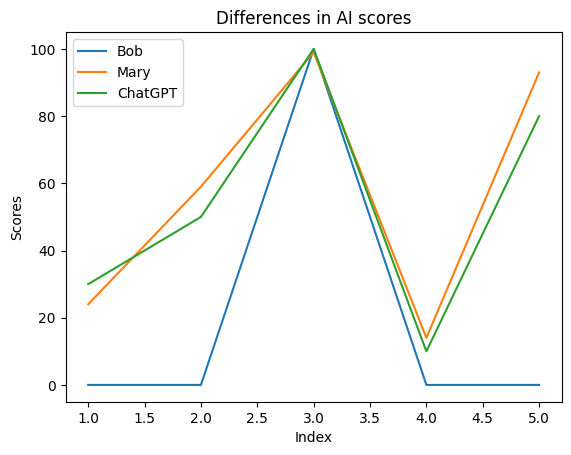

In [30]:
# Setting up the index of the results
index = [1, 2, 3, 4, 5]

# Plotting the lines
plt.plot(index, Bob, label = "Bob")
plt.plot(index, Mary, label = "Mary")
plt.plot(index, ChatGPT, label = "ChatGPT")

# Writing the labels & legend
plt.xlabel('Index')
plt.ylabel('Scores')
plt.title('Differences in AI scores')
plt.legend()

# Showing the graph
plt.show()

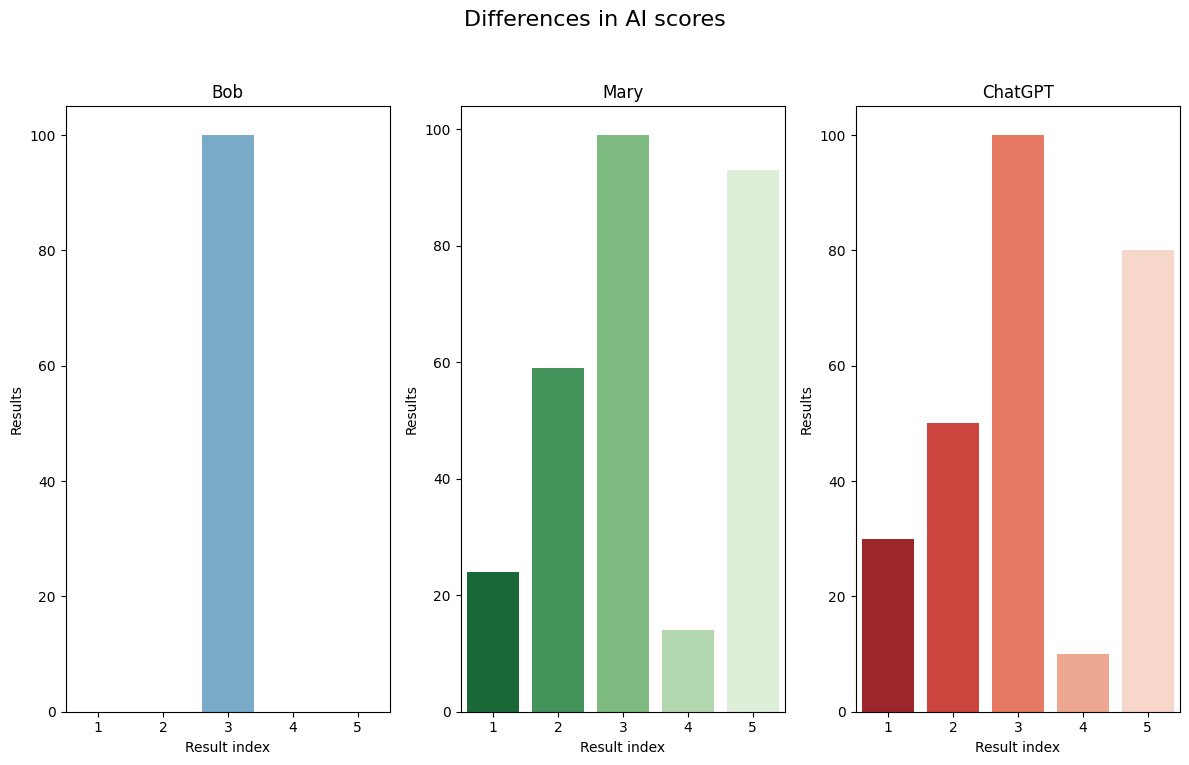

In [31]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 8)) # Our figure will be comprised of 2 x 2 subplots
sns.barplot(x=index, y=Bob, ax=axes[0], palette='Blues_r') # The x axis will depict the count, the y axis will depict the noun (which is the df index), the palette specifies a blue gradient
sns.barplot(x=index, y=Mary, ax=axes[1], palette='Greens_r')
sns.barplot(x=index, y=ChatGPT, ax=axes[2], palette='Reds_r')

# Set plot titles
axes[0].set_title('Bob')
axes[1].set_title('Mary')
axes[2].set_title('ChatGPT')

# Set y-axis labels to be more readable
for ax in axes.flat:
    ax.set_ylabel('Results')
    ax.set_xlabel('Result index')

# Set overall plot title and adjust spacing
plt.suptitle('Differences in AI scores', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
#Calculate the (negative,neutral,positive) distribution of a certain set of AI results
def calc_distr(AI_results):
    s = 5
    distr = [0,0,0]
    temp = [0,0,0]
        
    for el in AI_results:
        if el >= 66:
            i=2
        elif el>=33:
            i=1
        else:
            i=0
        temp[i] +=1
    
    i=0
    for el in temp:
        el = el*100/s
        distr[i]=el
        i+=1
        
    return distr

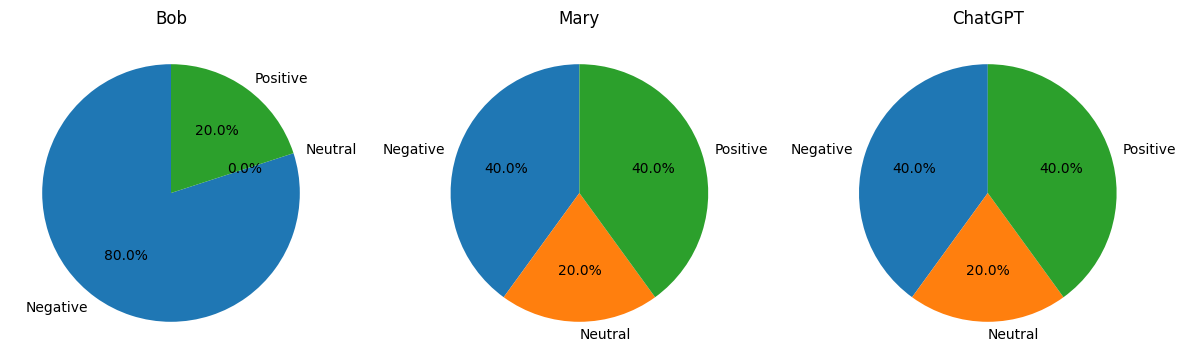

In [33]:
# Labels
labels = ['Negative', 'Neutral', 'Positive']

# Various distributions
Bob_distribution = calc_distr(Bob)
Mary_distribution = calc_distr(Mary)
ChatGPT_distribution = calc_distr(ChatGPT)

# Create a figure and divide it into subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first pie chart
axs[0].pie(Bob_distribution, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Bob')

# Plot the second pie chart
axs[1].pie(Mary_distribution, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Mary')

# Plot the third pie chart
axs[2].pie(ChatGPT_distribution, labels=labels, autopct='%1.1f%%', startangle=90)
axs[2].set_title('ChatGPT')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()

We can see that the Bob model, which only knows 'Positive' and 'Negative' is the least performant, while the 'Mary' model is quite similar with ChatGPT, at least on small data sets. We will choose to work with Mary moving forward.

# Actual data mining and applications

This is the actual application of the studied algorithms and Data Mining techniques. We chose to automatically Web Scrape books and subtitles, given a title as user input.

The purpose of this project is to compare a book with its movie adaptation and determine visually how faithful an adaptation it is.

In order to analyze the data, we split it (the book text / the subtitle text) in n equal parts and analyze the differences between corresponding parts in the book / subtitle.

We will apply the following on the obtained data:
- Data Cleaning & Preprocessing
- Language Models (cardiffnlp/twitter-roberta-base-sentiment-latest)
- Sentiment Analysis
- TF-IDF
- PoS Tagging

## Helper functions

In [34]:
def get_soup(url):
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36', 'Accept-Language': 'en-US,en;q=0.7'})
    return BeautifulSoup(response.text, 'html.parser')


def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

## User configurations. Split data in n parts. Also set dataset names to search for

In [35]:
# number of parts we want to split our datasets in
n = 10

# titles of contents we would like to analyze
names = ['Titanic', 'Pride and Prejudice', 'Wuthering Heights']

## Web scraping using Beautiful Soup HTML scraping 

Download the book and movie subtitles that most closely match the user input. Use Gutenberg and IMDb's seaches.

In [36]:
def download_book(book_title):
    candidates = []

    soup = get_soup(f'https://www.gutenberg.org/ebooks/search/?query={book_title}')
    book_links = soup.select('.booklink')

    # build a list of possible matches to the user's title input
    for bl in book_links:
        title = bl.select_one('.title').text
        candidates.append(title)

    # get closest match to user's title input
    closest = difflib.get_close_matches(book_title, candidates, n=1, cutoff=0.5)
    if len(closest) == 0:
        return None

    closest = closest[0]

    for bl in book_links:
        title = bl.select_one('.title').text
        
        if title == closest:
            link = bl.select_one('.link')['href']
            # get book's code
            code = link.split('/')[-1]
            # get and clean text of header and footer
            text = gutenbergpy.textget.get_text_by_id(code)
            text = gutenbergpy.textget.strip_headers(text)
            # text is a buffer. decode it
            encoding = chardet.detect(text)['encoding']
            
            return {'title': title, 'author': bl.select_one('.subtitle').text, 'text': text.decode(encoding)}


def build_book_df(book):
    book['text'] = preprocess_text(book['text'], True)
    # split book in n (defined above) parts
    book['parts'] = textwrap.wrap(book['text'], len(book['text']) / n)

    df = pd.DataFrame({'parts': book['parts']})
    df['title'] = book['title']
    df['author'] = book['author']
    
    return df


books = [download_book(name) for name in names]
book_dfs = [build_book_df(book) for book in books if book is not None]

for book_df in book_dfs:
    print(book_df)

                                                parts    title        author
0   titanic filson young christopher columbus new ...  Titanic  Filson Young
1   restive crowned one clock looked time upon thr...  Titanic  Filson Young
2   counter eighty feet high weighs hundred tons m...  Titanic  Filson Young
3   famine differences besides condition geographi...  Titanic  Filson Young
4   message appeal flashing far wide dark night ca...  Titanic  Filson Young
5   vivid partial knowledge man closely occupied d...  Titanic  Filson Young
6   juxtaposition two unclaimed solitary little ch...  Titanic  Filson Young
7   californian come carpathia taking survivors bo...  Titanic  Filson Young
8   tells story without turning right hand left fr...  Titanic  Filson Young
9   h sime mclaren lady women charter rights liber...  Titanic  Filson Young
10       essays socialism london strangeways printers  Titanic  Filson Young
                                                parts                title  

In [37]:
def download_subtitles(book_title):
    soup = get_soup(f'https://www.imdb.com/find/?q={book_title}')

    # get first result from an IMDb search
    li = soup.select_one('.find-title-result')
    if (li is None):
        return None

    span = li.select_one('.ipc-metadata-list-summary-item__li')
    # get movie's year
    year = int(span.text)
    a = li.select_one('.ipc-metadata-list-summary-item__t')
    link = a['href']
    # get movie's title
    title = a.text
    # get and clean IMDb code
    code = link.split('/')[2]
    code = code.replace('tt', '')
    code = int(code)

    # use IMDb code to get subtitle code
    soup = get_soup(f'https://www.opensubtitles.org/en/search/sublanguageid-eng/imdbid-{code}/sort-6/asc-0')
    a = soup.select_one('.bnone')
    link = a['href']
    code = link.split('/')[3]

    # download subtitle
    url = f'https://www.opensubtitles.org/en/subtitleserve/sub/{code}'
    response = requests.get(url).content
    # downloaded subtitle is a zip file
    zip = ZipFile(io.BytesIO(response))
    for f in zip.namelist():
        # take first srt file
        if (f.endswith('.srt')):
            # unzip and decode it
            buf = zip.read(f)
            encoding = chardet.detect(buf)['encoding']
            return {'title': title, 'year': year, 'text': buf.decode(encoding)}


def build_subs_df(subs):
    # srt.parse is a generator so we iterate it
    parsed = [x for x in srt.parse(subs['text'])]

    # total duration of subtitles
    total_duration  = sum((x.end - x.start).total_seconds() for x in parsed)
    # amount of time per part
    target_duration = total_duration / n

    split_parts = []
    current_part = []
    accumulated_duration = 0

    # split subtitles in n (defined above) parts
    for x in parsed:
        duration = (x.end - x.start).total_seconds()
        accumulated_duration += duration
        current_part.append(x)

        if accumulated_duration >= target_duration:
            parts = ' '.join([z.content for z in current_part])
            parts = preprocess_text(parts, True)
            y = {'start': current_part[0].start, 'end': current_part[-1].end, 'parts': parts}
            split_parts.append(y)
            current_part = []
            accumulated_duration = 0

    if current_part:
        parts = ' '.join([z.content for z in current_part])
        parts = preprocess_text(parts, True)
        y = {'start': current_part[0].start, 'end': current_part[-1].end, 'parts': parts}
        split_parts.append(y)

    df = pd.DataFrame(split_parts)
    df['title'] = subs['title']
    df['year'] = subs['year']
    
    return df


subses = [download_subtitles(name) for name in names]
subs_dfs = [build_subs_df(subs) for subs in subses if subs is not None]

for subs_df in subs_dfs:
    print(subs_df)

                   start                    end  \
0 0 days 00:01:49.078000 0 days 00:16:01.650000   
1 0 days 00:16:01.731000 0 days 00:32:39.649000   
2 0 days 00:32:40.860000 0 days 00:46:49.827000   
3 0 days 00:46:49.913000 0 days 00:59:17.281000   
4 0 days 00:59:17.370000 0 days 01:14:12.500000   
5 0 days 01:14:12.582000 0 days 01:36:56.093000   
6 0 days 01:37:24.098000 0 days 01:51:16.296000   
7 0 days 01:51:22.987000 0 days 02:07:22.189000   
8 0 days 02:07:22.516000 0 days 02:30:58.641000   
9 0 days 02:31:09.248000 0 days 02:59:40.415000   

                                               parts    title  year  
0  thirteen meters see okay take bow rail okay mi...  Titanic  1997  
1  wearing diamond day titanic sank makes new bes...  Titanic  1997  
2  like lamb right sweet pea sausage gon na cut m...  Titanic  1997  
3  love rude asking simple question love guy suit...  Titanic  1997  
4  knows every rivet thomas ship wonder mr andrew...  Titanic  1997  
5  need talk jack 

## Sentiment Analysis

Because the split data size is larger than the kernel size, we will 'stride' over it.

In [38]:
def AI_sentiment_analysis(text, should_preprocess = False):
  # clean text up if needed
  if should_preprocess:
    text = preprocess_text(text)
  
  # tokenize the text
  tokens = tokenizer.tokenize(text)

  # the model's max tokens length
  max_length = 512
  # stride length
  stride = 256
  # split into overlapping segments
  segments = [tokens[i:i+max_length] for i in range(0, len(tokens), stride)]

  # perform sentiment analysis for each segment and accumulate votes
  votes = []

  for segment in segments:
    segment = ' '.join(segment)
    # also add meta data special tokens
    segment_input = tokenizer.encode(segment, add_special_tokens=True, truncation=True, max_length=max_length)
    input_tensor = torch.tensor([segment_input])
    outputs = model(input_tensor)
    # get logits
    scores = outputs[0][0].detach().numpy()
    # turn them in sentiment probability vector
    scores = softmax(scores)
    votes.append(scores)

  # average of votes
  scores = [sum(elements) / len(elements) for elements in zip(*votes)]
  
  final_score = (scores[2] + scores[1]*0.5 - scores[0]*1.2)*100
  final_score = round(abs((final_score+100)/2))

  return final_score

In [39]:
for df in book_dfs:
  df['parts_sentiment'] = df.apply(lambda row : AI_sentiment_analysis(row['parts']), axis=1)

In [40]:
for df in subs_dfs:
  df['parts_sentiment'] = df.apply(lambda row : AI_sentiment_analysis(row['parts']), axis=1)

## TF-IDF

Apply TF-IDF on split in order to extract the most relevant n words and make an idea about what the scene it represents is about.

In [41]:
def get_most_relevant_n_words(column, n):
    # initialize the vectorizer
    vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
    # fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
    X = vectorizer.fit_transform(column).toarray()
    vocab = vectorizer.vocabulary_
    reverse_vocab = {v:k for k,v in vocab.items()}
    feature_names = vectorizer.get_feature_names_out()
    df_tfidf = pd.DataFrame(X, columns=feature_names)
    idx = X.argsort(axis=1)
    most_relevant_n = idx[:,-n:]

    result = [[reverse_vocab.get(item) for item in row]
                for i, row in enumerate(most_relevant_n)]
    
    [x.reverse() for x in result]

    result = [', '.join(x) for x in result]

    return result

In [42]:
for df in book_dfs:
  df['relevant_words'] = get_most_relevant_n_words(df['parts'], 10)
  print(df)

for df in subs_dfs:
  df['relevant_words'] = get_most_relevant_n_words(df['parts'], 10)
  print(df)

                                                parts    title        author  \
0   titanic filson young christopher columbus new ...  Titanic  Filson Young   
1   restive crowned one clock looked time upon thr...  Titanic  Filson Young   
2   counter eighty feet high weighs hundred tons m...  Titanic  Filson Young   
3   famine differences besides condition geographi...  Titanic  Filson Young   
4   message appeal flashing far wide dark night ca...  Titanic  Filson Young   
5   vivid partial knowledge man closely occupied d...  Titanic  Filson Young   
6   juxtaposition two unclaimed solitary little ch...  Titanic  Filson Young   
7   californian come carpathia taking survivors bo...  Titanic  Filson Young   
8   tells story without turning right hand left fr...  Titanic  Filson Young   
9   h sime mclaren lady women charter rights liber...  Titanic  Filson Young   
10       essays socialism london strangeways printers  Titanic  Filson Young   

    parts_sentiment                    

## PoS Tagging

Apply PoS Tagging in order to find the key people and key actions in the scenes that the split represents. 

In [43]:
def get_top_n_people(text, n):
    doc = nlp(text)
    people = [token.text for token in doc if token.ent_type_ == 'PERSON']

    counter = Counter(people)
    most_common = counter.most_common(n)
    return [element for element, _ in most_common]


def get_top_n_verbs(text, n):
    doc = nlp(text)
    verbs = [token.lemma_ for token in doc if token.pos_ == 'VERB']

    counter = Counter(verbs)
    most_common = counter.most_common(n)
    return [element for element, _ in most_common]


for df in book_dfs:
    people = [get_top_n_people(text, 3) for text in df['parts']]
    people = [', '.join(p) for p in people]

    verbs = [get_top_n_verbs(text, 5) for text in df['parts']]
    verbs = [', '.join(v) for v in verbs]
    
    df['relevant_people_and_verbs'] = [f"People: {p} | Verbs: {v}" for p, v in zip(people, verbs)]
    print(df)

for df in subs_dfs:
    people = [get_top_n_people(text, 3) for text in df['parts']]
    people = [', '.join(p) for p in people]

    verbs = [get_top_n_verbs(text, 5) for text in df['parts']]
    verbs = [', '.join(v) for v in verbs]
    
    df['relevant_people_and_verbs'] = [f"People: {p} | Verbs: {v}" for p, v in zip(people, verbs)]
    print(df)

                                                parts    title        author  \
0   titanic filson young christopher columbus new ...  Titanic  Filson Young   
1   restive crowned one clock looked time upon thr...  Titanic  Filson Young   
2   counter eighty feet high weighs hundred tons m...  Titanic  Filson Young   
3   famine differences besides condition geographi...  Titanic  Filson Young   
4   message appeal flashing far wide dark night ca...  Titanic  Filson Young   
5   vivid partial knowledge man closely occupied d...  Titanic  Filson Young   
6   juxtaposition two unclaimed solitary little ch...  Titanic  Filson Young   
7   californian come carpathia taking survivors bo...  Titanic  Filson Young   
8   tells story without turning right hand left fr...  Titanic  Filson Young   
9   h sime mclaren lady women charter rights liber...  Titanic  Filson Young   
10       essays socialism london strangeways printers  Titanic  Filson Young   

    parts_sentiment                    

## Visualizations

Finally, visualize a Sentiment Analysis / Split graph. In this one we also have the most relevant words in the split.

In [49]:
for pair in zip(book_dfs, subs_dfs):
    fig = make_subplots(rows=2, cols=1,
                        subplot_titles=(f"Book: {pair[0]['title'][0]} by {pair[0]['author'][0]}", f"Movie: {pair[1]['title'][0]}, {pair[1]['year'][0]}"))

    fig.add_trace(go.Scatter(x=pair[0].index,
                            y=pair[0]['parts_sentiment'],
                            text=pair[0]['relevant_words'],
                            mode='markers+lines+text'), row=1, col=1)

    fig.add_trace(go.Scatter(x=pair[1].index,
                            y=pair[1]['parts_sentiment'],
                            text=pair[1]['relevant_words'],
                            mode='markers+lines+text'), row=2, col=1)

    fig.update_layout(title_text='Average Sentiment per Part', hovermode='x', width=1000, height=1600)

    fig['layout']['xaxis']['title']='Part'
    fig['layout']['xaxis2']['title']='Part'
    fig['layout']['yaxis']['title']='Average Sentiment'
    fig['layout']['yaxis2']['title']='Average Sentiment'

    fig.show()

In this one we also have the most relevant people and actions in the split.

In [48]:
for pair in zip(book_dfs, subs_dfs):
    fig = make_subplots(rows=2, cols=1,
                        subplot_titles=(f"Book: {pair[0]['title'][0]} by {pair[0]['author'][0]}", f"Movie: {pair[1]['title'][0]}, {pair[1]['year'][0]}"))

    fig.add_trace(go.Scatter(x=pair[0].index,
                            y=pair[0]['parts_sentiment'],
                            text=pair[0]['relevant_people_and_verbs'],
                            mode='markers+lines+text'), row=1, col=1)

    fig.add_trace(go.Scatter(x=pair[1].index,
                            y=pair[1]['parts_sentiment'],
                            text=pair[1]['relevant_people_and_verbs'],
                            mode='markers+lines+text'), row=2, col=1)

    fig.update_layout(title_text='Average Sentiment per Part', hovermode='x', width=1000, height=1600)

    fig['layout']['xaxis']['title']='Part'
    fig['layout']['xaxis2']['title']='Part'
    fig['layout']['yaxis']['title']='Average Sentiment'
    fig['layout']['yaxis2']['title']='Average Sentiment'

    fig.show()